In [1]:
from sympy import *
import heppackv0 as hep

Reading heppackv0.py (March 2023)

Done


## 1) Kinematics

Amplitudes and cross section for Compton scattering, $\gamma+e\rightarrow\gamma+e$ in the high energy approximation,
i.e. $m=0$ where $m$ is the electron mass. Energy momentum conservation reads $k_i+p_i=k_f+p_f$. The CM system is used, with photon energy and angle given by $p,\theta$.

In [2]:
theta,u=symbols('theta u',real=True)
s,p=symbols('s p',positive=True)

In [3]:
ki=[p,0,0,0]
pin=[p,0,pi,pi]
kf=[p,0,theta,0]
pf=[p,0,pi-theta,pi]

CM energy squared $s=(k_i+p_i)^2$ and four momentum transfer squared to the recoil electron $u=(p_f-k_i)^2$ are expressed by CM variables:

In [4]:
sCM=4*p**2;print('sCM= ');sCM

sCM= 


In [5]:
uCM=-2*hep.dotprod4(hep.fourvec(ki),hep.fourvec(pf));uCM

uCM=


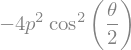

In [6]:
uCM=-4*p**2*cos(theta/2)**2;print('uCM=');uCM

## 2) Amplitudes and cross section

The scattering amplitude is determined by the sum of the $s$ channel and $u$ channel Feynman graph:

$$T_{{fi}}=e^{2}\bar{u}(p_f,s_f)\left(\not\!\varepsilon_f^*\frac{\not\! p_i+\not\! k_i+m}{(p_i+k_i)^{2}-m^{2}}\not\!\varepsilon_i+\not\!\varepsilon_i\frac{\not\! p_i-\not\! k_f+m}{(p_i-k_f)^{2}-m^{2}}\not\!\varepsilon_f^*\right)u(p,s_i)$$

The direct evaluation in the notebook is cumbersome. heppackv0.py contains the necessary procedures for the 8 (out of 16) independent helicity amplitudes $T_{fi}=T(\lambda_3 \lambda_4;\lambda_1 \lambda_2)$.

1) $T(--;--):$

t1=


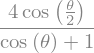

In [7]:
t1=simplify(hep.compt(ki, -1, pin, -1, kf, -1, pf, -1));print('t1=');t1

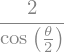

In [8]:
t1=2/cos(theta/2);t1

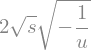

In [9]:
t1v1=2*sqrt(s/-u);t1v1

2) $T(-+;--):$

In [10]:
t2=simplify(hep.compt(ki, -1, pin, -1, kf, -1, pf, 1));print('t2');t2

t2


3) $T(++;--):$

In [11]:
t3=simplify(hep.compt(ki, -1, pin, -1, kf, 1, pf, 1));print('t3');t3

t3


4) $T(+-;--):$

In [12]:
t4=simplify(hep.compt(ki, -1, pin, -1, kf, 1, pf, -1));print('t4');t4

t4


5) $T(--;+-):$

In [13]:
t5=simplify(hep.compt(ki, 1, pin, -1, kf, -1, pf, -1));print('t5');t5

t5


6) $T(-+;+-):$

In [14]:
t6=simplify(hep.compt(ki, 1, pin, -1, kf, -1, pf, 1));print('t6');t6

t6


7) $T(++;+-):$

In [15]:
t7=simplify(hep.compt(ki, 1, pin, -1, kf, 1, pf, 1));print('t7');t7

t7


8) $T(+-;+-):$

t8


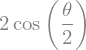

In [16]:
t8=simplify(hep.compt(ki, 1, pin, -1, kf, 1, pf, -1));print('t8');t8

invariant t8v1= 


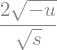

In [17]:
t8v1=2*sqrt(-u/s);print('invariant t8v1= ');t8v1

Squaring and averaging yields 

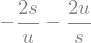

In [18]:
Tsqav=(t1v1**2+t8v1**2)/2;Tsqav

The cross section $d\sigma/dt$ is obtained by multiplication with the kinematic factor $1/16\pi s^2$ and the charge
factor $e^4=16\pi^2\alpha^2$ with the final result

$$\frac{\mathrm{d}\sigma}{\mathrm{d}t}(\gamma e^{-}\rightarrow\gamma e^{-})=\frac{2\pi\alpha^{2}}{s^{2}}\left(\frac{-u}{s}+\frac{s}{-u}\right)\enspace.$$



Addendum:  test of photon polarization vectors $\epsilon^\mu$

In [19]:
phi=symbols('phi',real=True)

In [20]:
ktest=[p,0,theta,phi];ktest

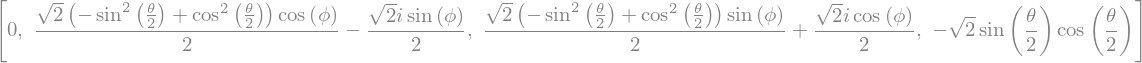

In [21]:
hep.pol(ktest,1)

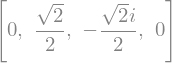

In [24]:
hep.polbar(ki,1)